https://stackoverflow.com/questions/18390150/pls-da-algorithm-in-python

In [12]:
import numpy as np
import pandas as pd
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler

In [37]:
df = pd.read_csv("../data/Iris.csv")

In [41]:
y = df["Species"]
X = df.loc[:, df.columns != "Species"].drop("Id", axis=1)

In [42]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [43]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(handle_unknown="ignore")
y_ohe = ohe.fit_transform(y.values.reshape(-1, 1))
y_ohe = pd.DataFrame(y_ohe.toarray(), columns=ohe.get_feature_names_out())
y_ohe.head()

,x0_Iris-setosa,x0_Iris-versicolor,x0_Iris-virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [44]:
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_std, y_ohe, random_state=42, train_size=0.8
)

In [46]:
n_components = 2  # 主成分の数
pls = PLSRegression(n_components=n_components)
pls.fit(X_train, y_train)

PLSRegression()

In [47]:
y_train_pred = pls.predict(X_train)
y_test_pred = pls.predict(X_test)

In [48]:
y_train_pred_label = np.argmax(y_train_pred, axis=1)
y_train_label = np.argmax(y_train, axis=1)
y_test_pred_label = np.argmax(y_test_pred, axis=1)
y_test_label = np.argmax(y_test, axis=1)

In [49]:
y_train_pred_label

array([0, 0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 2, 2, 0, 0, 1, 2, 2, 2, 2, 1, 2,
       2, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 2, 1, 0, 2, 1,
       1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 2, 0, 2, 0, 0, 2, 1, 2, 1, 1, 2, 1,
       0, 0, 1, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       1, 1, 2, 1, 2, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 2, 2, 2, 1, 2,
       1, 2, 2, 2, 0, 1, 1, 0, 1, 2])

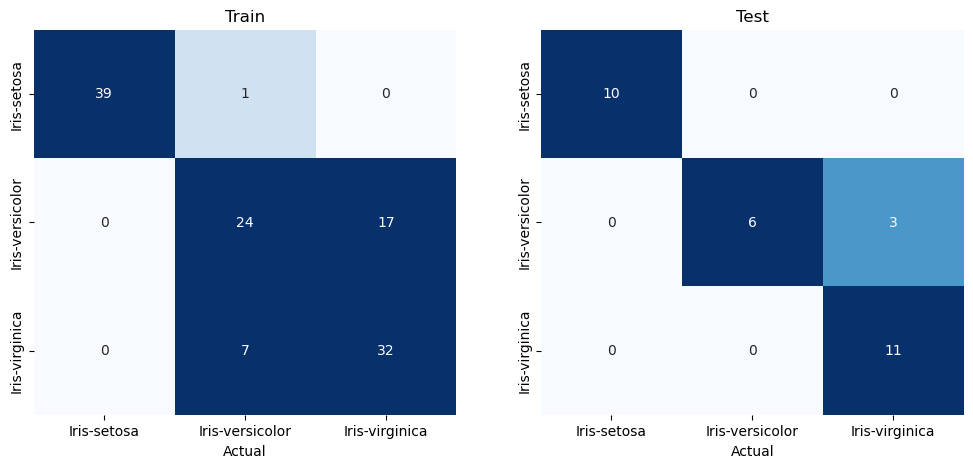

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(1, 2, 1)
cm_train = confusion_matrix(y_train_label, y_train_pred_label)
cm_train_df = pd.DataFrame(cm_train, index=y.unique(), columns=y.unique())
sns.heatmap(
    cm_train_df, annot=True, fmt="d", cmap="Blues", ax=ax1, vmin=0, vmax=5, cbar=False
)
ax1.set_xlabel("Predict")
ax1.set_xlabel("Actual")
ax1.set_title("Train")

ax2 = fig.add_subplot(1, 2, 2)
cm_test = confusion_matrix(y_test_label, y_test_pred_label)
cm_test_df = pd.DataFrame(cm_test, index=y.unique(), columns=y.unique())
sns.heatmap(
    cm_test_df, annot=True, fmt="d", cmap="Blues", ax=ax2, vmin=0, vmax=5, cbar=False
)
ax2.set_xlabel("Predict")
ax2.set_xlabel("Actual")
ax2.set_title("Test")

# プロットの表示
plt.show()

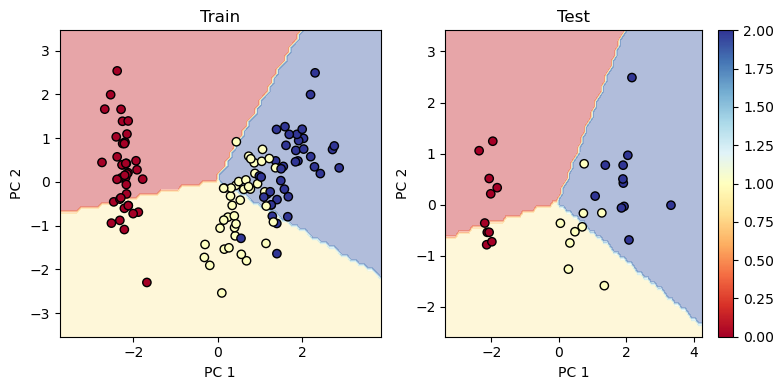

In [60]:
import numpy as np
import matplotlib.pyplot as plt


def plot_decision_boundary_2d(X, y, model, ax=None, cmap=plt.cm.RdYlBu):
    X_scores = model.transform(X)

    x_min, x_max = X_scores[:, 0].min() - 1, X_scores[:, 0].max() + 1
    y_min, y_max = X_scores[:, 1].min() - 1, X_scores[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

    Z = model.predict(
        np.c_[
            xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())
        ]
    )
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)

    if ax is None:
        ax = plt.gca()
    ax.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)

    scatter = ax.scatter(
        X_scores[:, 0], X_scores[:, 1], c=y, cmap=cmap, edgecolor="black"
    )

    ax.set_xlabel("PC 1")
    ax.set_ylabel("PC 2")
    ax.set_title("PLS Decision Boundary")

    return scatter


fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(1, 2, 1)
scatter = plot_decision_boundary_2d(X_train, y_train_label, pls, ax=ax)
ax.set_title("Train")

ax = fig.add_subplot(1, 2, 2)
scatter = plot_decision_boundary_2d(X_test, y_test_label, pls, ax=ax)
fig.colorbar(scatter)
ax.set_title("Test")
fig.tight_layout()